In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
sns.set_style("whitegrid")
%matplotlib inline

In [382]:
train= pd.read_csv('titanic_train.csv')
test= pd.read_csv('titanic_test.csv')
combine=[train,test]

In [383]:
#noting the variables in the dataset
train.columns
#categorical variable include Survived, Sex, Embarked 
#Ordinal variables Pclass

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [384]:
#top/bottom 10 observations
train.head(10)
train.tail(10)
#numeric variables Age, SibSp, Fare where Age and Fare are continous and SibSp and Parch are continous
#Ticket has mixed alpha numeric 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [385]:
#testing variables with null values
train.isnull().any()
#Age, Cabin, Embarked has missing values

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [386]:
#data types of all the variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [389]:
#distribution of numeric variables
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [390]:
#distribution of categorical variables
train.describe(include=['O'])
#name is unique throughtout
#there are two unique sex, with male having the highest percentage
#mast passangers embaked to Southampton

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Parr, Mr. William Henry Marsh",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [391]:
#Analyzing by pivoting variables as a way to establish correlation with Survived
train[['Pclass', 'Survived']].groupby(['Pclass'],as_index= False).mean()
#passangers in class 1 had a higher survival rate


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [392]:
#Pivoting sex with Survived
train[['Sex', 'Survived']].groupby(['Sex'],as_index= False).mean()
#74% of women Survived against 18% men

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [393]:
#Pivorting Parch with Survived
train[['Parch', 'Survived']].groupby(['Parch'],as_index= False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [394]:
#Pivoting Sibsp with survived
train[['SibSp', 'Survived']].groupby(['SibSp'],as_index= False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


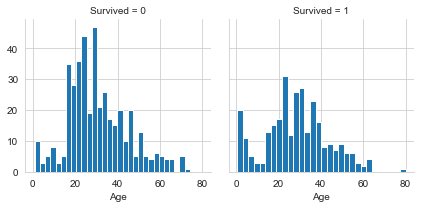

In [395]:
hist= sns.FacetGrid(train,col='Survived')
hist.map(plt.hist, 'Age', bins=30)

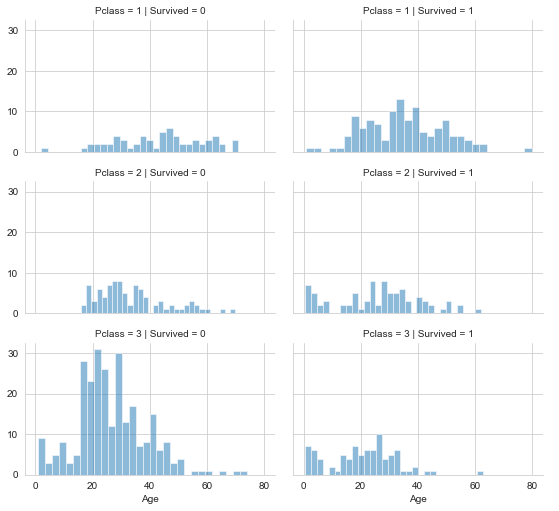

In [396]:
grid=sns.FacetGrid(train, col='Survived', row='Pclass', height=2.4, aspect=1.6, palette='nane')
grid.map(plt.hist,"Age", alpha=.5,bins=30)
grid.add_legend()
#most passangers from pclass 3 did not survive
#most passangers in pclass 1 survived

C:\Users\Gladwell Kanyi\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Gladwell Kanyi\Anaconda\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Gladwell Kanyi\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


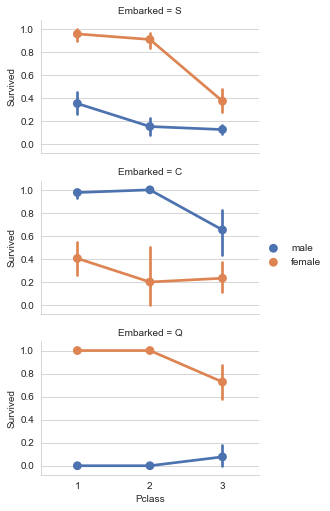

In [397]:
grid= sns.FacetGrid(train, row='Embarked', height=2.4, aspect=1.6)
grid.map(sns.pointplot, 'Pclass',"Survived","Sex", palette='deep')
grid.add_legend()

C:\Users\Gladwell Kanyi\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


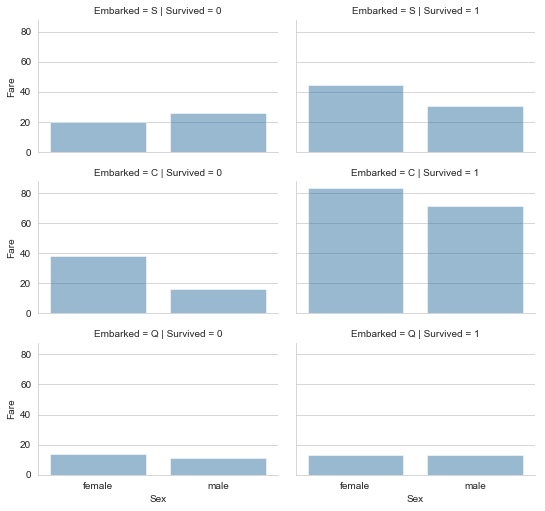

In [398]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.4, aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare', alpha=.5, ci=None)

In [399]:
#droping unwanted data
train= train.drop(['Ticket','Cabin'], axis=1)
test=test.drop(['Ticket','Cabin'], axis=1)
combine=[train,test]

In [400]:
#Creating new dataset from the existing dataset
#extracting titles from name

for data in combine:
    data['Title']=data.Name.str.extract('([A-Za-z]+)\.', expand= False)
    
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [401]:
for data in  combine:
    data["Title"]= data['Title'].replace(['Lady', 'Countess', 'Capt','Col','Don', 'Dr', 'Major', 'Rev', "Sir",
                                        'Jonkheer','Dona'], 'Rare')
    data['Title']=data['Title'].replace('Mlle','Miss')
    data['Title']=data['Title'].replace('Ms','Miss')
    data['Title']=data['Title'].replace('Mme','Mrs')
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [402]:
#Converting the categorical title into ordinal
title_map={'Mr':1, "Miss":2,"Mrs":3,"Master":4, "Rare":5}
for data in combine:
    data['Title']=data['Title'].map(title_map).astype(int)
    data['Title']=data['Title'].fillna(0)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [403]:
train=train.drop(['Name','PassengerId'], axis=1)
test=test.drop(['Name','PassengerId'], axis=1)
combine=[train, test]

In [404]:
#converting sex into a categorical variable with Female-1 and Male-0
Sex_map={'female':1, 'male':0}
for data in combine:
    data['Sex']=data['Sex'].map(Sex_map)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [329]:
#train=train.drop(['Name', 'PassengerId'], axis=1)


In [405]:
def imput_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
train['Age']=train[['Age','Pclass']].apply(imput_age,axis=1)

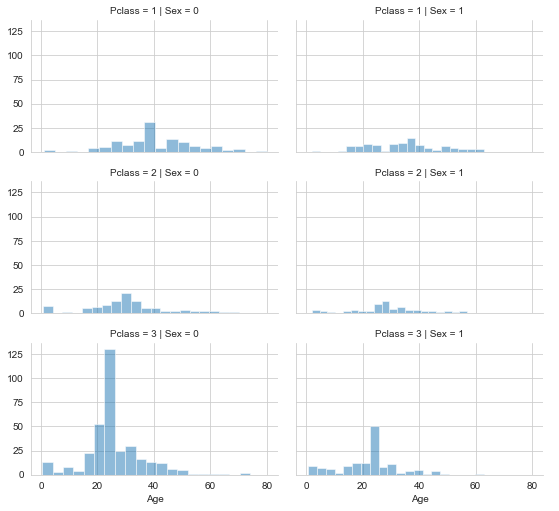

In [406]:
#completing and eastimating variables with missig values
grid= sns.FacetGrid(train, row='Pclass', col='Sex', height= 2.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins= 20)
grid.add_legend()

In [407]:
age_gues=np.zeros((2,3))
age_gues

array([[0., 0., 0.],
       [0., 0., 0.]])

In [408]:
#loop to calculate guessed values of Age 
for data in combine:
    for i in range (0,2):
        for j in range (0,3):
            guess= data[(data['Sex']==i)& (data['Pclass']==j+1)]['Age'].dropna()
gues_age=guess.median()
age_gues[i,j]=int(gues_age/0.5+0.5)*0.5

for i in range(0,2):
    for j in range (0,3):
        data.loc[(data.Age.isnull())& (data.Sex==i)& (data.Pclass == j+1), 'Age']=age_gues[i,j]
data['Age']=data['Age'].astype(int)
train.head()    
    
        

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [409]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
Title       False
dtype: bool

In [410]:
#age bands to determine correlation with survived
train['AgeBand']=pd.cut(train['Age'],5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending= True)
#people between 0-16 had 55% survival rate

combine=[train,test]

In [411]:
#replace age with ordinal numbers
for data in combine:
    data.loc[data['Age']<=16.0, 'Age']=0
    data.loc[(data['Age']>16.0) & (data['Age']<=32.0), 'Age']=1
    data.loc[(data['Age']>32.0) & (data['Age']<=48.0), 'Age']=2
    data.loc[(data['Age']>48.0) & (data['Age']<=64.0), 'Age']=3
    data.loc[data['Age']>64.0, 'Age']=4
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [412]:
#dropping age band
train=train.drop(['AgeBand'], axis=1)
combine=[train,test]
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,0,1.0,0,0,13.00,S,5
887,1,1,1,1.0,0,0,30.00,S,2
888,0,3,1,1.0,1,2,23.45,S,2
889,1,1,0,1.0,0,0,30.00,C,1
890,0,3,0,1.0,0,0,7.75,Q,1


In [413]:
#creating a family size variable
for data in combine:
    data['Family']=data['SibSp']+ data['Parch']+1
train[['Family','Survived']].groupby(['Family'],as_index=False).mean().sort_values(by='Survived',ascending=True)

,Family,Survived
7,8,0.000000
8,11,0.000000
5,6,0.136364
4,5,0.200000
0,1,0.303538
6,7,0.333333
1,2,0.552795
2,3,0.578431
3,4,0.724138


In [414]:
#passangers who wer alone and those that were a family
for data in combine:
    data['Alone']=0
    data.loc[data['Family']==1,'Alone']=1
    
train[['Alone','Survived']].groupby(['Alone'], as_index=False).mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [415]:
train=train.drop(['Parch','SibSp','Family'], axis=1)
test=test.drop(['Parch','SibSp','Family'], axis=1)
combine= [train,test]

In [416]:
#Age *Pclass
for data in combine:
    data['Age*Pclass']=data.Age*data.Pclass
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Age*Pclass
0,0,3,0,1.0,7.2500,S,1,0,3.0
1,1,1,1,2.0,71.2833,C,3,0,2.0
2,1,3,1,1.0,7.9250,S,2,1,3.0
3,1,1,1,2.0,53.1000,S,3,0,2.0
4,0,3,0,2.0,8.0500,S,1,1,6.0


In [417]:
#Completing embarked variable
frequency= train.Embarked.dropna().mode()[0]

for data in combine:
    data['Embarked']=data['Embarked'].fillna(frequency)
    
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [418]:
#converting categorical into numeric
dict={'S':0,'C':1,'Q':2}
for data in combine:
    data['Embarked']=data['Embarked'].map(dict)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Age*Pclass
0,0,3,0,1.0,7.2500,0,1,0,3.0
1,1,1,1,2.0,71.2833,1,3,0,2.0
2,1,3,1,1.0,7.9250,0,2,1,3.0
3,1,1,1,2.0,53.1000,0,3,0,2.0
4,0,3,0,2.0,8.0500,0,1,1,6.0


In [419]:
test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)

In [421]:
#test=test.drop(['PassengerId','Name'],axis=1)

In [422]:
#creating an ageband
train['FareBand']=pd.qcut(train['Fare'],4)
train[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [423]:
for data in combine:
    data.loc[data['Fare']<=7.91, 'Fare']=0
    data.loc[(data['Fare']>7.91)& (data['Fare']<=14.454),'Fare']=1
    data.loc[(data['Fare']>14.454)& (data['Fare']<=31),'Fare']=2
    data.loc[data['Fare']>31, 'Fare']=3
    data['Fare']=data['Fare'].astype(int)
#train=train.drop(['FareBand'],axis=1)
combine=[train,test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Age*Pclass,FareBand
0,0,3,0,1.0,0,0,1,0,3.0,"(-0.001, 7.91]"
1,1,1,1,2.0,3,1,3,0,2.0,"(31.0, 512.329]"
2,1,3,1,1.0,1,0,2,1,3.0,"(7.91, 14.454]"
3,1,1,1,2.0,3,0,3,0,2.0,"(31.0, 512.329]"
4,0,3,0,2.0,1,0,1,1,6.0,"(7.91, 14.454]"


In [431]:
train=train.drop(['FareBand'],axis=1)

In [433]:
test.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Age*Pclass
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3
5,3,0,0,1,0,1,1,0
6,3,1,1,0,2,2,1,3
7,2,0,1,2,0,1,0,2
8,3,1,1,0,1,3,1,3
9,3,0,1,2,0,1,0,3


# Model, Predict and solve

In [434]:
X=train.drop('Survived', axis=1)
y=train['Survived']

from sklearn.model_selection import train_test_split

In [435]:

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33, random_state=101)

In [442]:
#import a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [454]:
#fit a model
#it help measure the relationship between the categorical dependent and ore more variable
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)
Y_pred=logmodel.predict(X_test)
acc_log=round(logmodel.score(X_train,y_train)*100,2)
acc_log

print(classification_report(y_test,Y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       169
           1       0.81      0.70      0.75       126

   micro avg       0.80      0.80      0.80       295
   macro avg       0.81      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295

[[160   9]
 [ 43  83]]


C:\Users\Gladwell Kanyi\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 Sex is highest positive coefficient as sex value increase, the probability of survival increase
For Pclass, as Pclass increase, survival rate decrease


In [444]:
coeff=pd.DataFrame(train.columns.delete(0))
coeff.columns=['Variable']
coeff['Correlation']=pd.Series(logmodel.coef_[0])
coeff.sort_values(by='Correlation', ascending=False)

,Variable,Correlation
1,Sex,2.117949
6,Alone,0.397203
5,Title,0.384758
4,Embarked,0.336108
3,Fare,0.173943
7,Age*Pclass,0.098672
2,Age,-0.722409
0,Pclass,-1.188485


In [439]:
#Support vextor machines(it assigns new test samples to one category making in a linear classifier)
#higher score than Logmodel
from sklearn.svm import SVC

In [450]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,y_train)*100,2)
acc_svc

C:\Users\Gladwell Kanyi\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


84.06

In [453]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       169
           1       0.90      0.66      0.76       126

   micro avg       0.82      0.82      0.82       295
   macro avg       0.85      0.80      0.81       295
weighted avg       0.84      0.82      0.82       295

[[160   9]
 [ 43  83]]


KNN is a non-parametric method used fo classification and regression


In [455]:
from sklearn.neighbors import KNeighborsClassifier

In [464]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,y_train)*100,2)
print('\n')
print(classification_report(y_test,y_pred))
acc_knn



              precision    recall  f1-score   support

           0       0.79      0.95      0.86       169
           1       0.90      0.66      0.76       126

   micro avg       0.82      0.82      0.82       295
   macro avg       0.85      0.80      0.81       295
weighted avg       0.84      0.82      0.82       295



84.23

In [458]:
error_rate =[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'error rate')

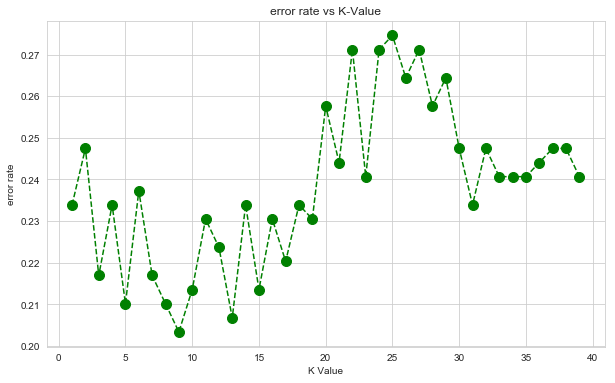

In [460]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o', markersize=10)
plt.title("error rate vs K-Value")
plt.xlabel("K Value")
plt.ylabel("error rate")

In [463]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,y_train)*100,2)
print(classification_report(y_test,y_pred))
acc_knn

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       169
           1       0.90      0.66      0.76       126

   micro avg       0.82      0.82      0.82       295
   macro avg       0.85      0.80      0.81       295
weighted avg       0.84      0.82      0.82       295



83.56

# Naive Bayes classifiers

In [465]:
from sklearn.naive_bayes import GaussianNB

In [468]:
gauss=GaussianNB()
gauss.fit(X_train,y_train)
Y_pred=gauss.predict(X_test)
acc_gaus=round(gauss.score(X_train,y_train)*100,2)
print(classification_report(y_test,y_pred))
acc_gaus

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       169
           1       0.90      0.66      0.76       126

   micro avg       0.82      0.82      0.82       295
   macro avg       0.85      0.80      0.81       295
weighted avg       0.84      0.82      0.82       295



78.19

# Decision tree

In [470]:
from sklearn.tree import DecisionTreeClassifier

In [474]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
Y_pred=dec_tree.predict(X_test)
acc_dec_tree=round(dec_tree.score(X_train,y_train)*100,2)
print(classification_report(y_test,Y_pred))

acc_dec_tree

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       169
           1       0.80      0.65      0.72       126

   micro avg       0.78      0.78      0.78       295
   macro avg       0.79      0.77      0.77       295
weighted avg       0.79      0.78      0.78       295



87.75

# Random forest
















In [475]:
from sklearn.ensemble import RandomForestClassifier

In [477]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
Y_pred=random_forest.predict(X_test)
acc_random_forest=round(random_forest.score(X_train,y_train)*100,2)
print(classification_report(y_test,Y_pred))
acc_random_forest

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       169
           1       0.79      0.69      0.74       126

   micro avg       0.79      0.79      0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



87.75

# Model evaluation


In [480]:
models= pd.DataFrame({'Model':['Support vector machines', 'KNN', 'Logistic regression', 'Random forest', 'Naive bayes', 'Decision tree'], 'Score'
                     :[acc_svc,acc_knn, acc_log, acc_random_forest, acc_gaus,acc_dec_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random forest,87.75
5,Decision tree,87.75
1,KNN,84.23
0,Support vector machines,84.06
2,Logistic regression,80.20
4,Naive bayes,78.19


In [503]:
importances = pd.DataFrame({'variables':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,variables,importance
5,Title,0.251
1,Sex,0.208
0,Pclass,0.132
3,Fare,0.129
7,Age*Pclass,0.102
4,Embarked,0.084
2,Age,0.053
6,Alone,0.041
